In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from numpy.random import rand

In [3]:
#Loading the mitbih data set
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/mitbih_test.csv", header=None)
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/mitbih_train.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Fining the outliers
continous_features =   train[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            train.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(train[continous_features])

For the feature 0, No of Outliers is 12161
For the feature 1, No of Outliers is 5575
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 1786
For the feature 4, No of Outliers is 6596


In [5]:
#Removing the outliers
outliers(train[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed


In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=15000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=15000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=15000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=15000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=15000, random_state=113)

In [7]:
train= pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4])

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
2    15000
3    15000
4    15000
Name: 187, dtype: int64


In [8]:
x_train = train.iloc[:, 1:-1].values
y_train = train.iloc[:, -1].values

In [9]:
x_test = test.iloc[:, 1:-1].values
y_test = test.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#**Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10,
                                   criterion = 'entropy',
                                   random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
RFC_pred = RFC.predict(x_test)


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, RFC_pred)
print(cm)
a1 = accuracy_score(y_test, RFC_pred)
print(a1)
print(classification_report(y_test, RFC_pred))

[[17580    82   401    10    45]
 [  307   236     8     1     4]
 [  666    44   719     3    16]
 [  141     0     6    15     0]
 [  177     5    95     0  1331]]
0.9081399598026676
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     18118
         1.0       0.64      0.42      0.51       556
         2.0       0.59      0.50      0.54      1448
         3.0       0.52      0.09      0.16       162
         4.0       0.95      0.83      0.89      1608

    accuracy                           0.91     21892
   macro avg       0.73      0.56      0.61     21892
weighted avg       0.90      0.91      0.90     21892



#**Support Vector Machine**

In [14]:
#Training the SVM model 
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly', degree=3, probability=True)
SVM.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [15]:
pred_SVM = SVM.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_SVM = confusion_matrix(y_test, pred_SVM)
print(cm_SVM)
a_SVM = accuracy_score(y_test, pred_SVM)
print("Accuarcy of the model",a_SVM)
print(classification_report(y_test, pred_SVM))


[[14964   558  1044   922   630]
 [  137   366    36     7    10]
 [  333   185   852    39    39]
 [    6     0    12   143     1]
 [   33     5    59     2  1509]]
Accuarcy of the model 0.814635483281564
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89     18118
         1.0       0.33      0.66      0.44       556
         2.0       0.43      0.59      0.49      1448
         3.0       0.13      0.88      0.22       162
         4.0       0.69      0.94      0.79      1608

    accuracy                           0.81     21892
   macro avg       0.51      0.78      0.57     21892
weighted avg       0.89      0.81      0.84     21892



#**KNeighbor Classification**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
pred_KNN = KNN.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_KNN = confusion_matrix(y_test, pred_KNN)
print(cm_KNN)
a_KNN = accuracy_score(y_test, pred_KNN)
print("Accuarcy of the model",a_KNN)
print(classification_report(y_test, pred_KNN))

[[15330   964  1066   573   185]
 [   89   423    32     6     6]
 [  207   106  1049    49    37]
 [    6     3    19   133     1]
 [   28    11    28     1  1540]]
Accuarcy of the model 0.8439155856020464
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     18118
         1.0       0.28      0.76      0.41       556
         2.0       0.48      0.72      0.58      1448
         3.0       0.17      0.82      0.29       162
         4.0       0.87      0.96      0.91      1608

    accuracy                           0.84     21892
   macro avg       0.56      0.82      0.62     21892
weighted avg       0.91      0.84      0.87     21892



#**Voting Classifier**

In [20]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svm', SVM), ('knn', KNN), ('rfc', RFC)])
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9064955234788964

#**Ada Boost**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


max_estimators = 100
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 1, # Just a stump.
                                      random_state = np.random.RandomState(0)),
                               n_estimators = max_estimators,
                               random_state = np.random.RandomState(0))

# Fit all estimators.
ada_boost.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1,
                                                         random_state=RandomState(MT19937) at 0x7F67D25CBAF0),
                   n_estimators=100,
                   random_state=RandomState(MT19937) at 0x7F67D25CBC00)

In [22]:
ada_boost.score(x_test, y_test)

0.5726749497533346

#**XGBoost**

In [23]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set,verbose=True)



[0]	validation_0-merror:0.2292	validation_0-mlogloss:1.47519	validation_1-merror:0.459848	validation_1-mlogloss:1.54516
[1]	validation_0-merror:0.21592	validation_0-mlogloss:1.36648	validation_1-merror:0.450347	validation_1-mlogloss:1.49129
[2]	validation_0-merror:0.2078	validation_0-mlogloss:1.275	validation_1-merror:0.424402	validation_1-mlogloss:1.44406
[3]	validation_0-merror:0.199067	validation_0-mlogloss:1.19281	validation_1-merror:0.427325	validation_1-mlogloss:1.39849
[4]	validation_0-merror:0.199347	validation_0-mlogloss:1.12248	validation_1-merror:0.426503	validation_1-mlogloss:1.35988
[5]	validation_0-merror:0.194573	validation_0-mlogloss:1.05956	validation_1-merror:0.423671	validation_1-mlogloss:1.32482
[6]	validation_0-merror:0.191373	validation_0-mlogloss:1.00414	validation_1-merror:0.415494	validation_1-mlogloss:1.29617
[7]	validation_0-merror:0.18776	validation_0-mlogloss:0.95559	validation_1-merror:0.409784	validation_1-mlogloss:1.27074
[8]	validation_0-merror:0.188987

XGBClassifier(objective='multi:softprob')

In [24]:
# make predictions for test data
predictions = model.predict(x_test)

In [25]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

In [26]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

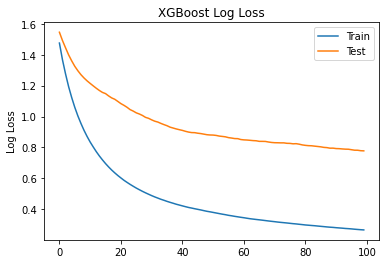

In [27]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

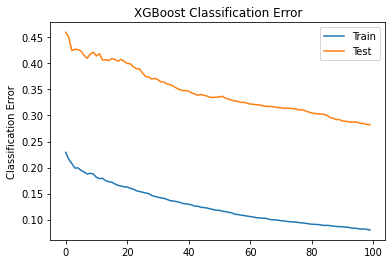

In [28]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#**Artificial Neural Network**

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = pd.DataFrame( columns=["Accuracy","Precision","Recall"])
#predictions = np.zeros(shape=(10000,7))
row_index = 0
for i in range(7):
        # bootstrap sampling  
        boot_train = resample(x_train,y_train,replace=True, n_samples=40000, random_state=None)
        model1 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=x_train[0].shape),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(5, activation=tf.nn.softmax)])
  
        # compile the model1
        model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

        # Train the model1
        model1.fit(x_train,y_train,epochs=5,batch_size=32, validation_data=(x_test, y_test))
        # evaluate the model1
        model1.evaluate(x_test, y_test)

Epoch 1/5
2344/2344 [==============================] - 20s 8ms/step - loss: 0.4365 - accuracy: 0.8495 - val_loss: 0.8013 - val_accuracy: 0.7512
Epoch 2/5
2344/2344 [==============================] - 19s 8ms/step - loss: 0.2705 - accuracy: 0.9097 - val_loss: 0.7221 - val_accuracy: 0.7747
Epoch 3/5
2344/2344 [==============================] - 19s 8ms/step - loss: 0.2436 - accuracy: 0.9221 - val_loss: 0.7648 - val_accuracy: 0.7347
Epoch 4/5
2344/2344 [==============================] - 19s 8ms/step - loss: 0.2179 - accuracy: 0.9287 - val_loss: 0.8318 - val_accuracy: 0.7809
Epoch 5/5
685/685 [==============================] - 2s 3ms/step - loss: 0.8968 - accuracy: 0.7333
Epoch 1/5
2344/2344 [==============================] - 21s 8ms/step - loss: 0.4432 - accuracy: 0.8443 - val_loss: 0.6812 - val_accuracy: 0.7966
Epoch 2/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.2605 - accuracy: 0.9127 - val_loss: 0.6794 - val_accuracy: 0.7996
Epoch 3/5
2344/2344 [================

In [30]:
import numpy 
cvscores1 = []
scores = model1.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
cvscores1.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores1), numpy.std(cvscores1)))
      

accuracy: 70.43%
70.43% (+/- 0.00%)


#**CNN**

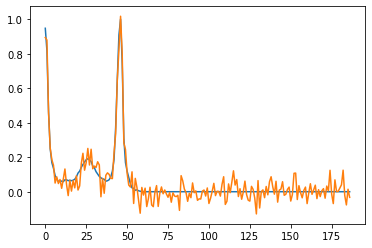

In [31]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

sample = train_lbl0.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [33]:

ytrain = tensorflow.keras.utils.to_categorical(train[187])
ytest = tensorflow.keras.utils.to_categorical(test[187])

# Input to the model
xtrain = train.values[:, :187]
xtest = test.values[:, :187]

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [34]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (75000, 187, 1)
Output:  (75000, 5)

Shape of test data: 
Input:  (21892, 187, 1)
Output:  (21892, 5)


In [35]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 182, 64)           448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 18, 64)          

In [36]:
history = model.fit(xtrain, ytrain, epochs = 8, batch_size = 32, validation_data = (xtest, ytest))


Epoch 1/8
2344/2344 [==============================] - 86s 36ms/step - loss: 0.3651 - accuracy: 0.8683 - val_loss: 0.3874 - val_accuracy: 0.8780
Epoch 2/8
2344/2344 [==============================] - 92s 39ms/step - loss: 0.1685 - accuracy: 0.9371 - val_loss: 0.3016 - val_accuracy: 0.9080
Epoch 3/8
2344/2344 [==============================] - 92s 39ms/step - loss: 0.1223 - accuracy: 0.9539 - val_loss: 0.3842 - val_accuracy: 0.8857
Epoch 4/8
2344/2344 [==============================] - 92s 39ms/step - loss: 0.0985 - accuracy: 0.9636 - val_loss: 0.3877 - val_accuracy: 0.9051
Epoch 5/8
2344/2344 [==============================] - 91s 39ms/step - loss: 0.0844 - accuracy: 0.9682 - val_loss: 0.3097 - val_accuracy: 0.9170
Epoch 6/8
2344/2344 [==============================] - 91s 39ms/step - loss: 0.0729 - accuracy: 0.9731 - val_loss: 0.3684 - val_accuracy: 0.9223
Epoch 7/8
2344/2344 [==============================] - 91s 39ms/step - loss: 0.0650 - accuracy: 0.9761 - val_loss: 0.4212 - val_ac

In [37]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

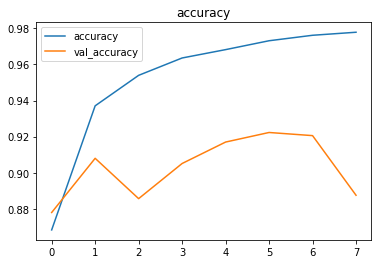

In [39]:
plot(history.history, "accuracy", "val_accuracy")

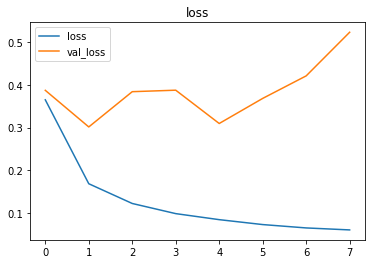

In [40]:
plot(history.history, "loss", "val_loss")

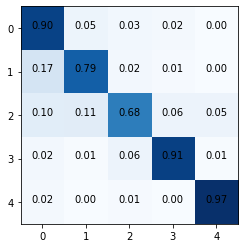

In [41]:
ypred = model.predict(xtest)

cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [42]:
print("The distribution of test set labels")
print(test[187].value_counts())

print('F1_score = ', f1_score(ytest.argmax(axis=1), ypred.argmax(axis=1), average = 'macro'))

The distribution of test set labels
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
F1_score =  0.6782354521384251
